In [ ]:
#instalar jitcdde
pip install jitcdde

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for jitcdde: filename=jitcdde-1.8.1-py3-none-any.whl size=55003 sha256=60c6c5eed3a6ddf318e118a4c15a91353c7f7013c60f1f03b0bef24ebc5bfa45
  Stored in directory: /root/.cache/pip/wheels/42/e3/4e/94b61188e5e3e62ba27e9586da5ecc7ea0f24e26916a250cc7
  Created wheel for chspy: filename=CHSPy-1.2.2-py3-none-any.whl size=11999 sha256=3087e40833acbe0c1fa34945958467e56c5c2a80137234f507e130445fc08e2c
  Stored in directory: /root/.cache/pip/wheels/11/17/24/0cca70842afd051f54325b813e637d8e8836d88c286ba63fae
  Created wheel for jitcxde_common: filename=jitcxde_common-1.5.4-py3-none-any.whl size=16755 sha256=69ed7af39d13d1fbe3df0d69788d06c24db5b40d48998f86d7afa8dc8b5890b8
  Stored in directory: /root/.cache

## Caso 1


In [ ]:
# Constants from the document
r=2.5
K=2.
n=0.8
omega=0.5
miu=4.
nu=1.5
tau_values = np.linspace(0.1, 0.45, 500)  # Range of tau values for bifurcation

# Placeholder for bifurcation data
bifurcation_data_E = []
bifurcation_data_T = []
time = np.linspace(100, 200, 500)
d=symengine.symbols("d")
equations=[
    r*y(0, t)*(1-(y(0, t)/K))-n*y(1, t)*y(0, t),
	  omega+miu*y(0, t - d)*y(1, t)-nu*y(1, t)
]

# Simulation for each tau value
for tau in tau_values:
    # Initialize DDE
    DDE = jitcdde(equations, control_pars=[d], max_delay=tau)
    DDE.constant_past([0.25,5])
    params=[tau]
    DDE.set_parameters(*params)
    # initial condition
    # Integrate and collect data
    for moment in time:
        state = DDE.integrate(moment)
        bifurcation_data_T.append((tau, state[0]))
        bifurcation_data_E.append((tau, state[1]))

# Convert data to numpy array
bifurcation_data_E = np.array(bifurcation_data_E)
bifurcation_data_T = np.array(bifurcation_data_T)

Generating, compiling, and loading C code.
Using default integration parameters.
Generating, compiling, and loading C code.
Using default integration parameters.
Generating, compiling, and loading C code.
Using default integration parameters.
Generating, compiling, and loading C code.
Using default integration parameters.
Generating, compiling, and loading C code.
Using default integration parameters.
Generating, compiling, and loading C code.
Using default integration parameters.
Generating, compiling, and loading C code.
Using default integration parameters.
Generating, compiling, and loading C code.
Using default integration parameters.
Generating, compiling, and loading C code.
Using default integration parameters.
Generating, compiling, and loading C code.
Using default integration parameters.
Generating, compiling, and loading C code.
Using default integration parameters.
Generating, compiling, and loading C code.
Using default integration parameters.
Generating, compiling, and l

In [ ]:
import pandas as pd
bifurcation_E = pd.DataFrame(bifurcation_data_E)
bifurcation_E_max = bifurcation_E.groupby(0).max()
bifurcation_E_min = bifurcation_E.groupby(0).min()

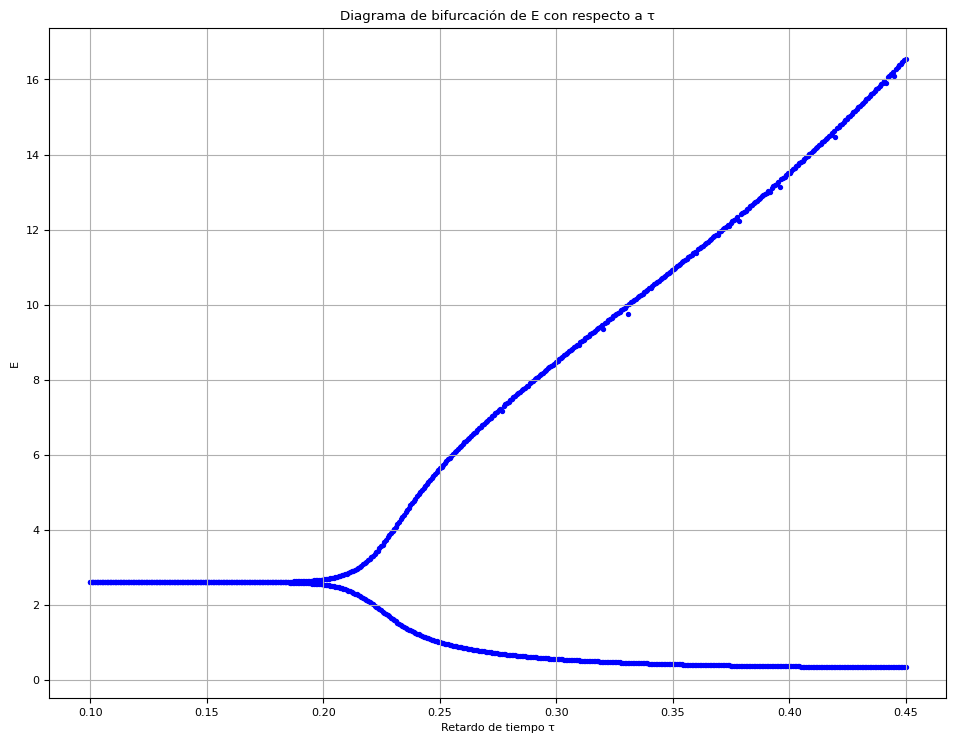

In [ ]:
plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)
axs.scatter(bifurcation_E_max.index, bifurcation_E_max.values ,color='blue', s=8)
axs.scatter(bifurcation_E_min.index, bifurcation_E_min.values ,color='blue', s=8)
plt.title('Diagrama de bifurcación de E con respecto a τ')
plt.xlabel('Retardo de tiempo τ')
plt.ylabel('E')
plt.grid(True)



Generating, compiling, and loading C code.
Using default integration parameters.


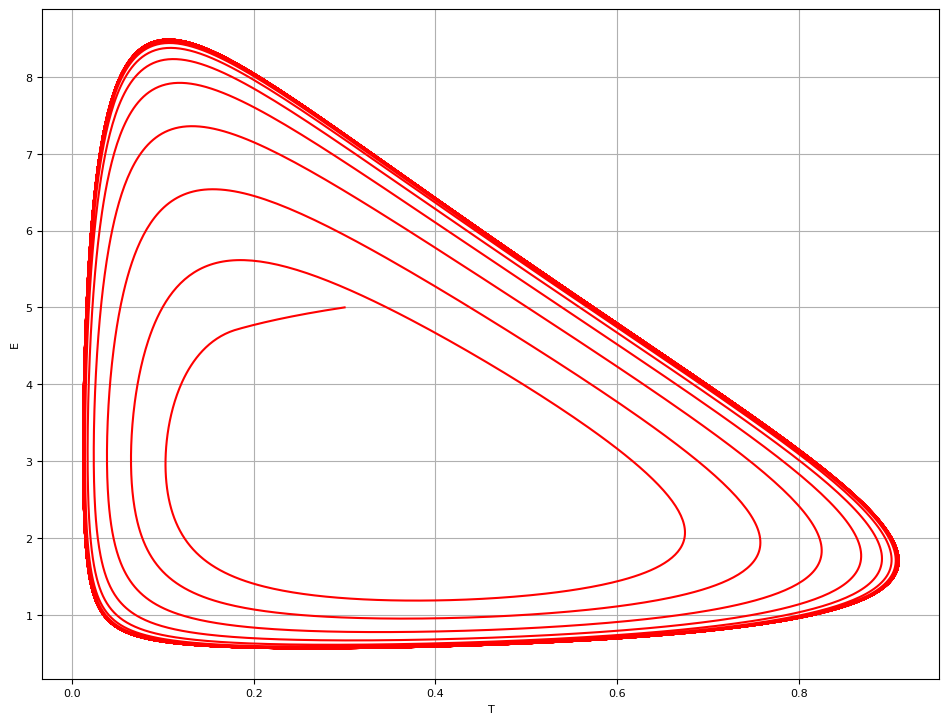

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import symengine
from jitcdde import jitcdde, y, t

r=2.5
K=2.
n=0.8
omega=0.5
miu=4.
nu=1.5

d=symengine.symbols("d")
equations=[
    r*y(0, t)*(1-(y(0, t)/K))-n*y(1, t)*y(0, t),
	  omega+miu*y(0, t - d)*y(1, t)-nu*y(1, t)
]
ddesys = jitcdde(equations, control_pars=[d], max_delay=0.3)


ts = np.linspace(0, 100, 10000)

ddesys.constant_past([0.3, 5.])
params=[0.3]
ddesys.set_parameters(*params)
ys = []
for t in ts:
	ys.append(ddesys.integrate(t))
ys=np.array(ys)
plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)
#axs.scatter( 0.45367250374008194, 0.28954685162448784, color='blue')
axs.plot( ys[:,0], ys[:,1], color='red')
plt.xlabel('T')
plt.ylabel('E')
plt.grid(True)

In [ ]:
from scipy.integrate import odeint
def Tumor_model(y,t,r,K,n,omega,miu,nu):
    T,E = y
    dTdt = r*T*(1-(T/K))-n*E*T
    dEdt = omega+miu*T*E-nu*E
    return [dTdt, dEdt]


Generating, compiling, and loading C code.
Using default integration parameters.
Generating, compiling, and loading C code.
Using default integration parameters.
Generating, compiling, and loading C code.
Using default integration parameters.


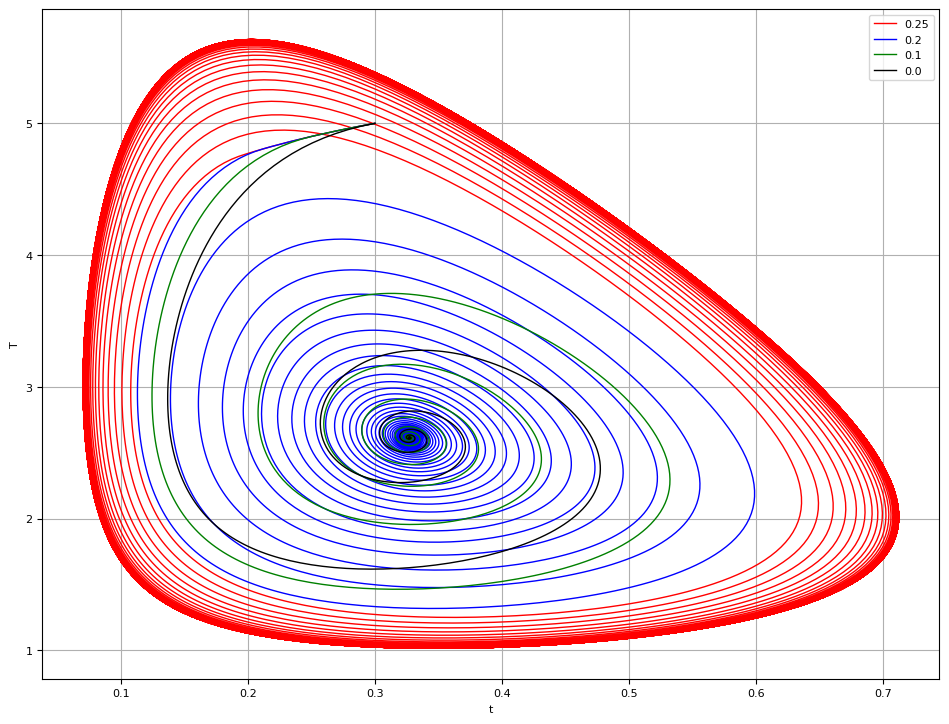

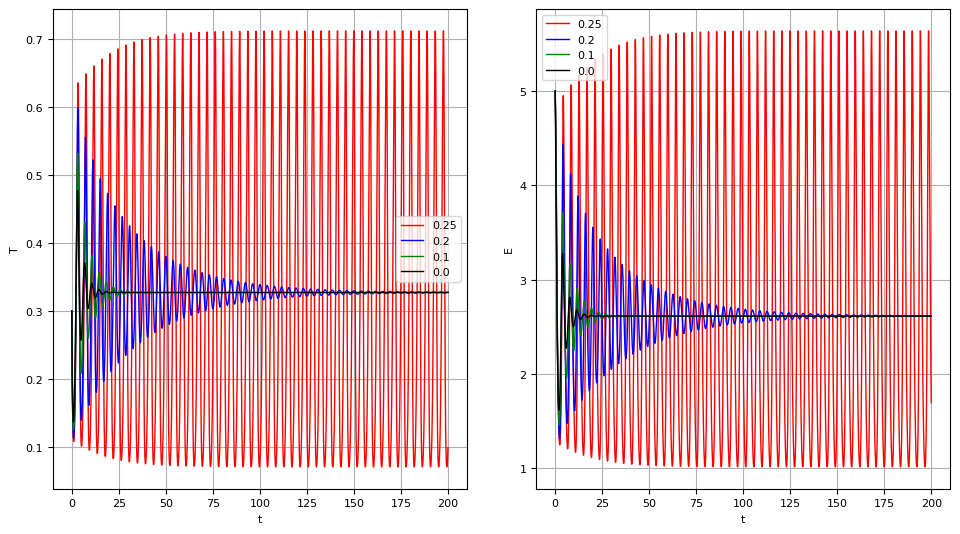

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import symengine
from jitcdde import jitcdde, y, t

r=2.5
K=2.
n=0.8
omega=0.5
miu=4.
nu=1.5

d=symengine.symbols("d")
equations=[
    r*y(0, t)*(1-(y(0, t)/K))-n*y(1, t)*y(0, t),
	  omega+miu*y(0, t - d)*y(1, t)-nu*y(1, t)
]
ddesys1 = jitcdde(equations, control_pars=[d], max_delay=10)
ddesys2 = jitcdde(equations, control_pars=[d], max_delay=10)
ddesys3 = jitcdde(equations, control_pars=[d], max_delay=10)

ts = np.linspace(0, 200, 10000)

ddesys1.constant_past([0.3, 5.])
ddesys2.constant_past([0.3, 5.])
ddesys3.constant_past([0.3, 5.])
y0sd = [0.3, 5.]
params1=[0.25]
params2=[0.2]
params3=[0.1]
ddesys1.set_parameters(*params1)
ddesys2.set_parameters(*params2)
ddesys3.set_parameters(*params3)
ys1 = []
ys2 = []
ys3 = []
for t in ts:
	ys1.append(ddesys1.integrate(t))
for t in ts:
  ys2.append(ddesys2.integrate(t))
for t in ts:
  ys3.append(ddesys3.integrate(t))

ys1=np.array(ys1)
ys2=np.array(ys2)
ys3=np.array(ys3)


# Solve the SIR model equations using odeint()
solution = odeint(Tumor_model, y0sd, ts, args=(r,K,n,omega,miu,nu))

# Extract results
T,E = solution.T

# Crear la figura y los subgráficos
fig, axs = plt.subplots(1, 1, figsize=(10,8))
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)  # Ajustar diseño de la figura

# Subgráfico 1
axs.plot(ys1[:,0],ys1[:,1], color='red', linewidth=1, label='0.25')
axs.plot(ys2[:,0],ys2[:,1], color='blue', linewidth=1, label='0.2')
axs.plot(ys3[:,0],ys3[:,1], color='green', linewidth=1, label='0.1')
axs.plot(T, E, color='black', linewidth=1, label='0.0')
#axs.scatter( 0.45367250374008194, 0.28954685162448784, color='green', label='P^*')
axs.set_xlabel('t')
axs.set_ylabel('T')
axs.legend()  # Añadir leyenda al subgráfico 1
axs.grid(True)  # Añadir rejilla al subgráfico 1



# Mostrar la figura
plt.show()

# Crear la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)  # Ajustar diseño de la figura

# Subgráfico 1
ax1.plot(ts, ys1[:,0], color='red', linewidth=1, label='0.25')
ax1.plot(ts, ys2[:,0], color='blue', linewidth=1, label='0.2')
ax1.plot(ts, ys3[:,0], color='green', linewidth=1, label='0.1')
ax1.plot(ts, T, color='black', linewidth=1, label='0.0')
ax1.set_xlabel('t')
ax1.set_ylabel('T')
ax1.legend()  # Añadir leyenda al subgráfico 1
ax1.grid(True)  # Añadir rejilla al subgráfico 1

# Subgráfico 2
ax2.plot(ts, ys1[:,1], color='red', linewidth=1, label='0.25')
ax2.plot(ts, ys2[:,1], color='blue', linewidth=1, label='0.2')
ax2.plot(ts, ys3[:,1], color='green', linewidth=1, label='0.1')
ax2.plot(ts, E, color='black', linewidth=1, label='0.0')
ax2.set_xlabel('t')
ax2.set_ylabel('E')
ax2.legend()  # Añadir leyenda al subgráfico 2
ax2.grid(True)  # Añadir rejilla al subgráfico 2


# Mostrar la figura
plt.show()

Generating, compiling, and loading C code.
Using default integration parameters.
Generating, compiling, and loading C code.
Using default integration parameters.
Generating, compiling, and loading C code.
Using default integration parameters.


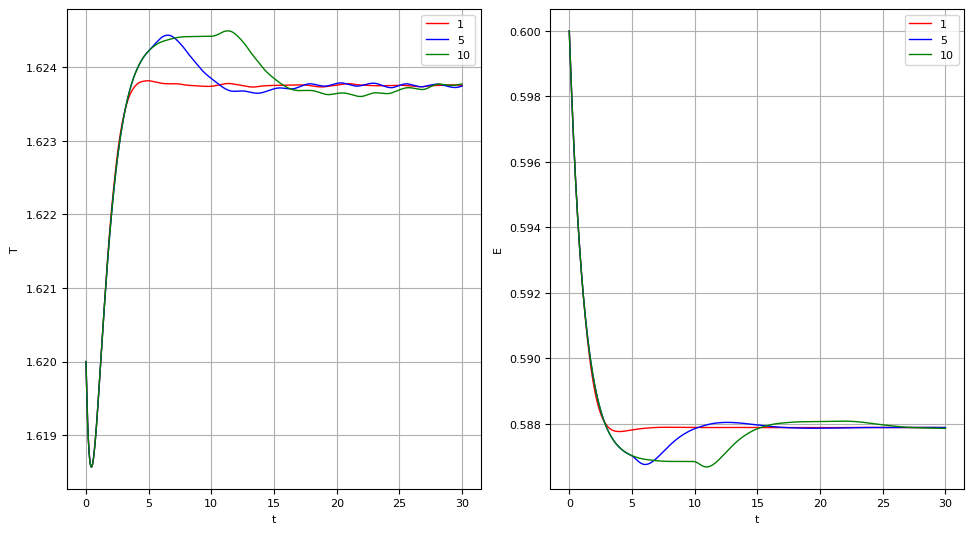

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import symengine
from jitcdde import jitcdde, y, t

r=2.5
K=2.
n=0.8
omega=0.5
miu=0.4
nu=1.5

d=symengine.symbols("d")
equations=[
    r*y(0, t)*(1-(y(0, t)/K))-n*y(1, t)*y(0, t),
	  omega+miu*y(0, t - d)*y(1, t)-nu*y(1, t)
]
ddesys1 = jitcdde(equations, control_pars=[d], max_delay=10)
ddesys2 = jitcdde(equations, control_pars=[d], max_delay=10)
ddesys3 = jitcdde(equations, control_pars=[d], max_delay=10)

ts = np.linspace(0, 30, 3000)

ddesys1.constant_past([1.62,0.6])
ddesys2.constant_past([1.62,0.6])
ddesys3.constant_past([1.62,0.6])
params1=[1]
params2=[5]
params3=[10]
ddesys1.set_parameters(*params1)
ddesys2.set_parameters(*params2)
ddesys3.set_parameters(*params3)
ys1 = []
ys2 = []
ys3 = []
for t in ts:
	ys1.append(ddesys1.integrate(t))
for t in ts:
  ys2.append(ddesys2.integrate(t))
for t in ts:
  ys3.append(ddesys3.integrate(t))

ys1=np.array(ys1)
ys2=np.array(ys2)
ys3=np.array(ys3)

# Crear la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)  # Ajustar diseño de la figura

# Subgráfico 1
ax1.plot(ts, ys1[:,0], color='red', linewidth=1, label='1')
ax1.plot(ts, ys2[:,0], color='blue', linewidth=1, label='5')
ax1.plot(ts, ys3[:,0], color='green', linewidth=1, label='10')
ax1.set_xlabel('t')
ax1.set_ylabel('T')
ax1.legend()  # Añadir leyenda al subgráfico 1
ax1.grid(True)  # Añadir rejilla al subgráfico 1

# Subgráfico 2
ax2.plot(ts, ys1[:,1], color='red', linewidth=1, label='1')
ax2.plot(ts, ys2[:,1], color='blue', linewidth=1, label='5')
ax2.plot(ts, ys3[:,1], color='green', linewidth=1, label='10')
ax2.set_xlabel('t')
ax2.set_ylabel('E')
ax2.legend()  # Añadir leyenda al subgráfico 2
ax2.grid(True)  # Añadir rejilla al subgráfico 2

# Mostrar la figura
plt.show()

## Caso 2

Generating, compiling, and loading C code.
Using default integration parameters.
Generating, compiling, and loading C code.
Using default integration parameters.
Generating, compiling, and loading C code.
Using default integration parameters.


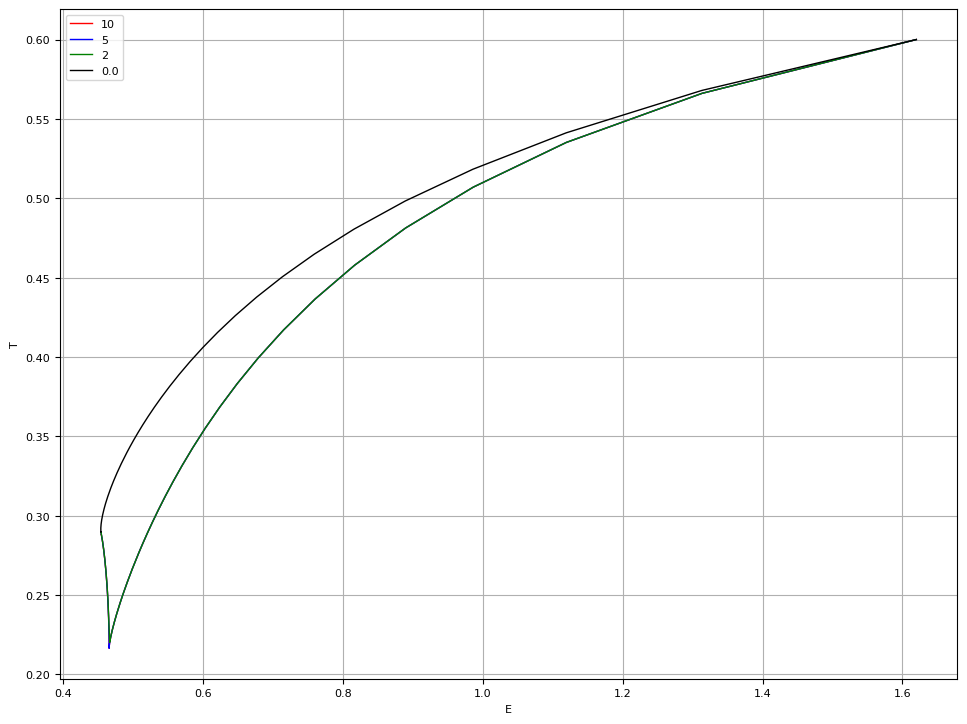

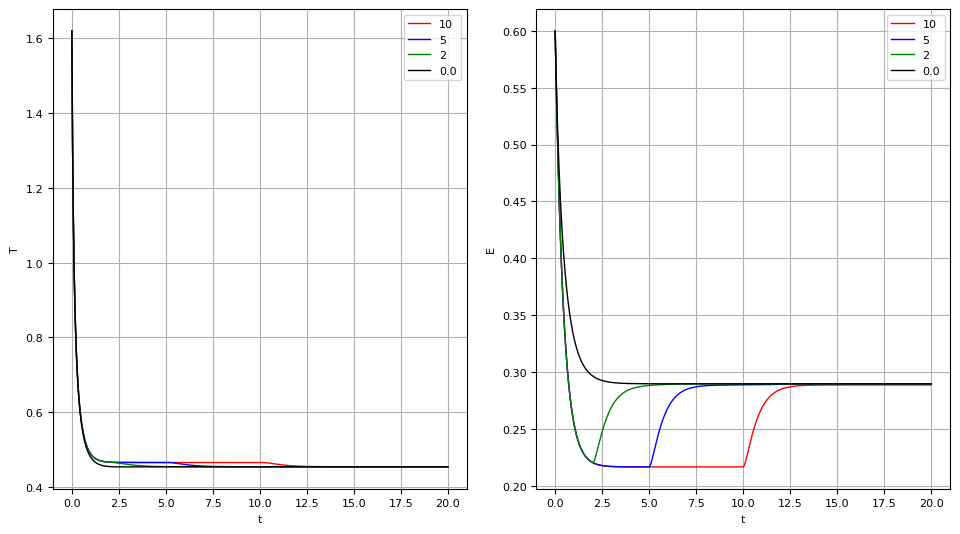

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import symengine
from jitcdde import jitcdde, y, t

r=2.5
K=0.5
n=0.8
omega=0.5
miu=-0.5
nu=1.5

d=symengine.symbols("d")
equations=[
    r*y(0, t)*(1-(y(0, t)/K))-n*y(1, t)*y(0, t),
	  omega+miu*y(0, t - d)*y(1, t)-nu*y(1, t)
]
ddesys1 = jitcdde(equations, control_pars=[d], max_delay=10)
ddesys2 = jitcdde(equations, control_pars=[d], max_delay=10)
ddesys3 = jitcdde(equations, control_pars=[d], max_delay=10)

ts = np.linspace(0, 20, 500)

ddesys1.constant_past([1.62,0.6])
ddesys2.constant_past([1.62,0.6])
ddesys3.constant_past([1.62,0.6])
y0sd = [1.62,0.6]
params1=[10]
params2=[5]
params3=[2]
ddesys1.set_parameters(*params1)
ddesys2.set_parameters(*params2)
ddesys3.set_parameters(*params3)
ys1 = []
ys2 = []
ys3 = []
for t in ts:
	ys1.append(ddesys1.integrate(t))
for t in ts:
  ys2.append(ddesys2.integrate(t))
for t in ts:
  ys3.append(ddesys3.integrate(t))

ys1=np.array(ys1)
ys2=np.array(ys2)
ys3=np.array(ys3)


# Solve the SIR model equations using odeint()
solution = odeint(Tumor_model, y0sd, ts, args=(r,K,n,omega,miu,nu))

# Extract results
T,E = solution.T

# Crear la figura y los subgráficos
fig, axs = plt.subplots(1, 1, figsize=(10,8))
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)  # Ajustar diseño de la figura

# Subgráfico 1
axs.plot(ys1[:,0],ys1[:,1], color='red', linewidth=1, label='10')
axs.plot(ys2[:,0],ys2[:,1], color='blue', linewidth=1, label='5')
axs.plot(ys3[:,0],ys3[:,1], color='green', linewidth=1, label='2')
axs.plot(T, E, color='black', linewidth=1, label='0.0')
#axs.scatter( 0.45367250374008194, 0.28954685162448784, color='green', label='P^*')
axs.set_xlabel('E')
axs.set_ylabel('T')
axs.legend()  # Añadir leyenda al subgráfico 1
axs.grid(True)  # Añadir rejilla al subgráfico 1

# Mostrar la figura
plt.show()
# Crear la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)  # Ajustar diseño de la figura

# Subgráfico 1
ax1.plot(ts, ys1[:,0], color='red', linewidth=1, label='10')
ax1.plot(ts, ys2[:,0], color='blue', linewidth=1, label='5')
ax1.plot(ts, ys3[:,0], color='green', linewidth=1, label='2')
ax1.plot(ts, T, color='black', linewidth=1, label='0.0')
ax1.set_xlabel('t')
ax1.set_ylabel('T')
ax1.legend()  # Añadir leyenda al subgráfico 1
ax1.grid(True)  # Añadir rejilla al subgráfico 1

# Subgráfico 2
ax2.plot(ts, ys1[:,1], color='red', linewidth=1, label='10')
ax2.plot(ts, ys2[:,1], color='blue', linewidth=1, label='5')
ax2.plot(ts, ys3[:,1], color='green', linewidth=1, label='2')
ax2.plot(ts, E, color='black', linewidth=1, label='0.0')
ax2.set_xlabel('t')
ax2.set_ylabel('E')
ax2.legend()  # Añadir leyenda al subgráfico 2
ax2.grid(True)  # Añadir rejilla al subgráfico 2


# Mostrar la figura
plt.show()

## Caso 3

Generating, compiling, and loading C code.
Using default integration parameters.
Generating, compiling, and loading C code.
Using default integration parameters.
Generating, compiling, and loading C code.
Using default integration parameters.


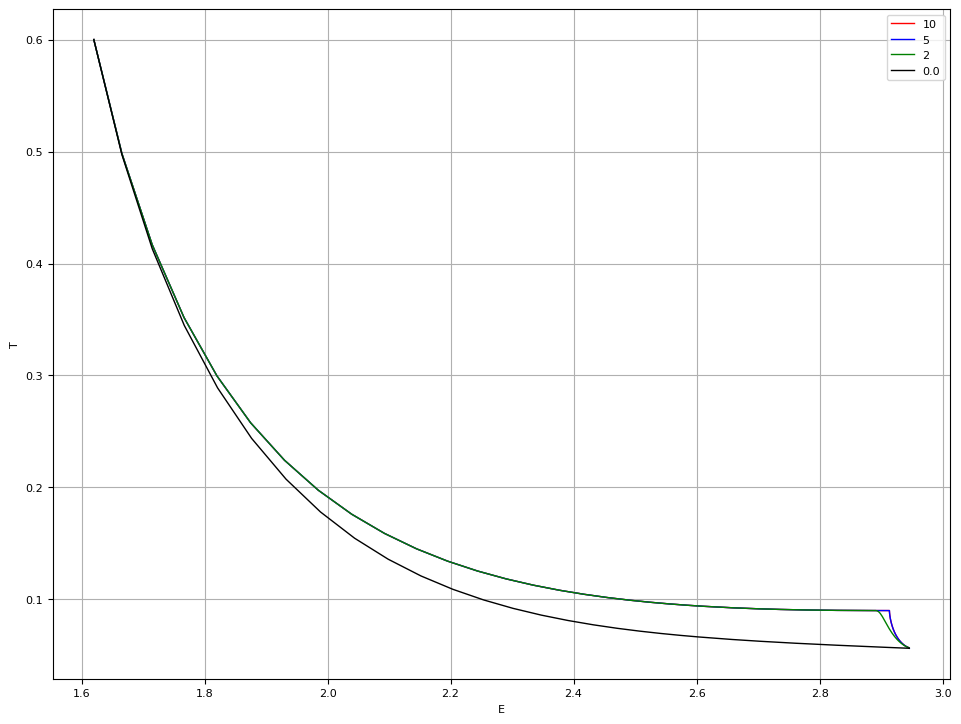

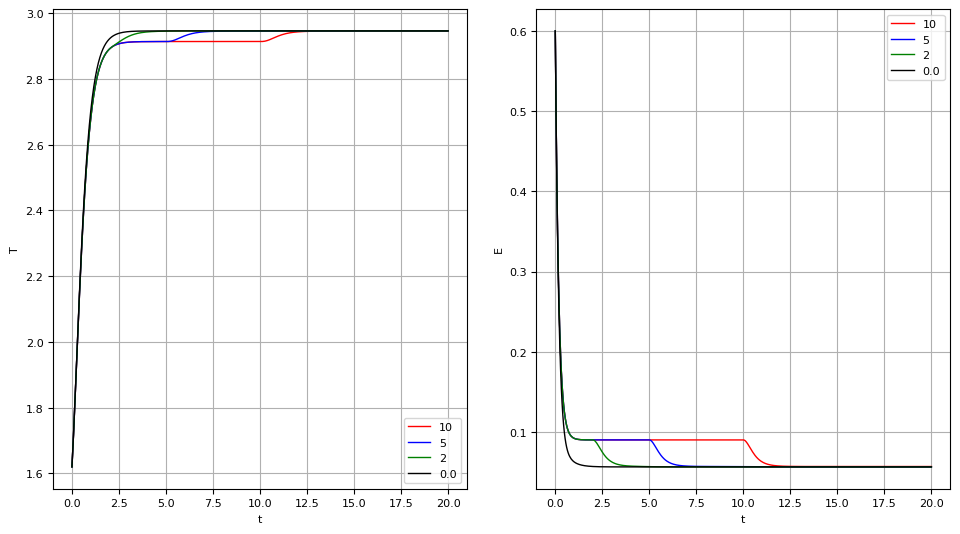

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import symengine
from jitcdde import jitcdde, y, t

r=2.5
K=3.
n=0.8
omega=0.5
miu=-2.5
nu=1.5

d=symengine.symbols("d")
equations=[
    r*y(0, t)*(1-(y(0, t)/K))-n*y(1, t)*y(0, t),
	  omega+miu*y(0, t - d)*y(1, t)-nu*y(1, t)
]
ddesys1 = jitcdde(equations, control_pars=[d], max_delay=10)
ddesys2 = jitcdde(equations, control_pars=[d], max_delay=10)
ddesys3 = jitcdde(equations, control_pars=[d], max_delay=10)

ts = np.linspace(0, 20, 500)

ddesys1.constant_past([1.62,0.6])
ddesys2.constant_past([1.62,0.6])
ddesys3.constant_past([1.62,0.6])
y0sd = [1.62,0.6]
params1=[10]
params2=[5]
params3=[2]
ddesys1.set_parameters(*params1)
ddesys2.set_parameters(*params2)
ddesys3.set_parameters(*params3)
ys1 = []
ys2 = []
ys3 = []
for t in ts:
	ys1.append(ddesys1.integrate(t))
for t in ts:
  ys2.append(ddesys2.integrate(t))
for t in ts:
  ys3.append(ddesys3.integrate(t))

ys1=np.array(ys1)
ys2=np.array(ys2)
ys3=np.array(ys3)


# Solve the SIR model equations using odeint()
solution = odeint(Tumor_model, y0sd, ts, args=(r,K,n,omega,miu,nu))

# Extract results
T,E = solution.T

# Crear la figura y los subgráficos
fig, axs = plt.subplots(1, 1, figsize=(10,8))
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)  # Ajustar diseño de la figura

# Subgráfico 1
axs.plot(ys1[:,0],ys1[:,1], color='red', linewidth=1, label='10')
axs.plot(ys2[:,0],ys2[:,1], color='blue', linewidth=1, label='5')
axs.plot(ys3[:,0],ys3[:,1], color='green', linewidth=1, label='2')
axs.plot(T, E, color='black', linewidth=1, label='0.0')
#axs.scatter( 0.45367250374008194, 0.28954685162448784, color='green', label='P^*')
axs.set_xlabel('E')
axs.set_ylabel('T')
axs.legend()  # Añadir leyenda al subgráfico 1
axs.grid(True)  # Añadir rejilla al subgráfico 1

# Mostrar la figura
plt.show()
# Crear la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)  # Ajustar diseño de la figura

# Subgráfico 1
ax1.plot(ts, ys1[:,0], color='red', linewidth=1, label='10')
ax1.plot(ts, ys2[:,0], color='blue', linewidth=1, label='5')
ax1.plot(ts, ys3[:,0], color='green', linewidth=1, label='2')
ax1.plot(ts, T, color='black', linewidth=1, label='0.0')
ax1.set_xlabel('t')
ax1.set_ylabel('T')
ax1.legend()  # Añadir leyenda al subgráfico 1
ax1.grid(True)  # Añadir rejilla al subgráfico 1

# Subgráfico 2
ax2.plot(ts, ys1[:,1], color='red', linewidth=1, label='10')
ax2.plot(ts, ys2[:,1], color='blue', linewidth=1, label='5')
ax2.plot(ts, ys3[:,1], color='green', linewidth=1, label='2')
ax2.plot(ts, E, color='black', linewidth=1, label='0.0')
ax2.set_xlabel('t')
ax2.set_ylabel('E')
ax2.legend()  # Añadir leyenda al subgráfico 2
ax2.grid(True)  # Añadir rejilla al subgráfico 2


# Mostrar la figura
plt.show()

## Caso 4

Generating, compiling, and loading C code.
Using default integration parameters.
Generating, compiling, and loading C code.


/usr/local/lib/python3.10/dist-packages/chspy/_chspy.py:470: UserWarning: The spline already contains points. This will remove them. Be sure that you really want this.
  warn("The spline already contains points. This will remove them. Be sure that you really want this.")


Using default integration parameters.


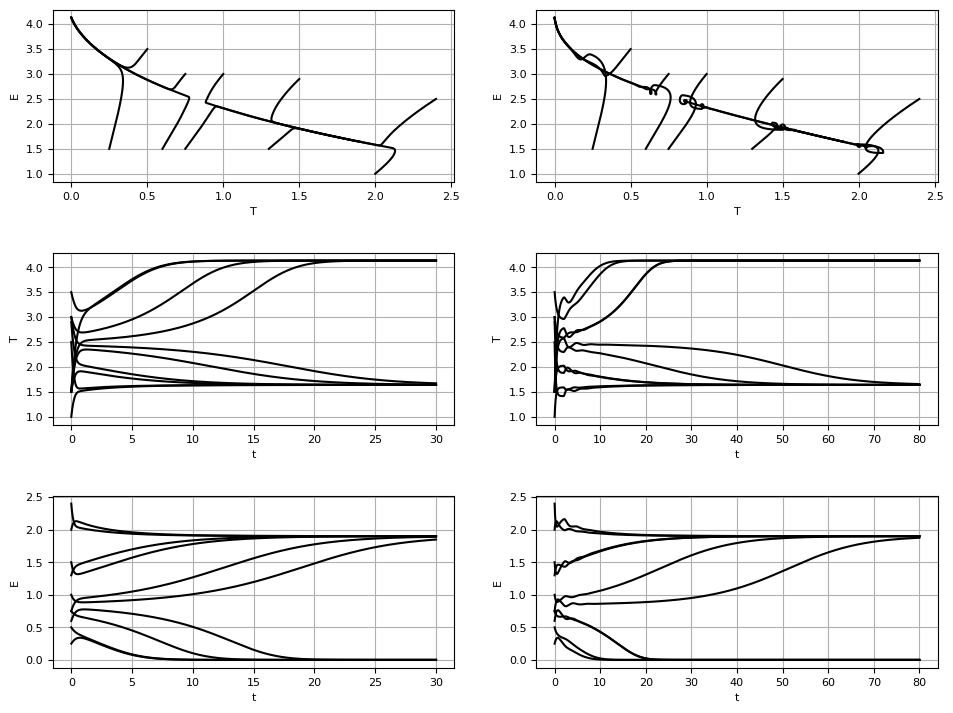

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import symengine
from jitcdde import jitcdde, y, t

r=2.5
K=4.
n=0.8
omega=6.2
miu=-1.2
nu=1.5


constant_past =[[0.25,1.5],[0.5,3.5],[0.6,1.5],[0.75,3],[0.75,1.5],[1.,3.],[1.3,1.5],[1.5,2.9],[2.,1.],[2.4,2.5]]

d=symengine.symbols("d")
equations=[
    r*y(0, t)*(1-(y(0, t)/K))-n*y(1, t)*y(0, t),
    omega+miu*y(0, t - d)*y(1, t)-nu*y(1, t)
]
ddesys = jitcdde(equations, control_pars=[d], max_delay=0.3)
ddesys2 = jitcdde(equations, control_pars=[d], max_delay=2.)
ts = np.linspace(0, 30, 3000)
ts2 = np.linspace(0, 80, 8000)
def ys_vi(constants):
  ddesys.constant_past(vi)
  params=[0.3]
  ddesys.set_parameters(*params)
  ys = []
  for t in ts:
    ys.append(ddesys.integrate(t))
  ys=np.array(ys)
  return ys
def ys_vi2(constants):
  ddesys2.constant_past(vi)
  params=[2.]
  ddesys2.set_parameters(*params)
  ys = []
  for t in ts2:
    ys.append(ddesys2.integrate(t))
  ys=np.array(ys)
  return ys
outputs = {}  # Dictionary to store outputs
i=0
outputs2 = {}  # Dictionary to store outputs
i2=0
for vi in constant_past:
  output = ys_vi(vi)
  outputs[f'ys{i}'] = output
  i=i+1

for vi in constant_past:
  output2 = ys_vi2(vi)
  outputs2[f'ys{i2}'] = output2
  i2=i2+1
#plots
plt.rcParams['font.size'] = 8
#fig, axs = plt.subplots(1, 1)
# plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(3, 2, figsize=(10, 8))  # 3 rows, 2 columns
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)

# Customize each subplot
# Subplot 1 (row 1, column 1)
axs[0,0].plot(outputs['ys0'][:,0], outputs['ys0'][:,1], color='black')
axs[0,0].plot(outputs['ys1'][:,0], outputs['ys1'][:,1], color='black')
axs[0,0].plot(outputs['ys2'][:,0], outputs['ys2'][:,1], color='black')
axs[0,0].plot(outputs['ys3'][:,0], outputs['ys3'][:,1], color='black')
axs[0,0].plot(outputs['ys4'][:,0], outputs['ys4'][:,1], color='black')
axs[0,0].plot(outputs['ys5'][:,0], outputs['ys5'][:,1], color='black')
axs[0,0].plot(outputs['ys6'][:,0], outputs['ys6'][:,1], color='black')
axs[0,0].plot(outputs['ys7'][:,0], outputs['ys7'][:,1], color='black')
axs[0,0].plot(outputs['ys8'][:,0], outputs['ys8'][:,1], color='black')
axs[0,0].plot(outputs['ys9'][:,0], outputs['ys9'][:,1], color='black')
axs[0,0].set_xlabel('T')
axs[0,0].set_ylabel('E')
axs[0,0].grid(True)

# # Subplot 2 (row 1, column 2)
axs[0,1].plot(outputs2['ys0'][:,0], outputs2['ys0'][:,1], color='black')
axs[0,1].plot(outputs2['ys1'][:,0], outputs2['ys1'][:,1], color='black')
axs[0,1].plot(outputs2['ys2'][:,0], outputs2['ys2'][:,1], color='black')
axs[0,1].plot(outputs2['ys3'][:,0], outputs2['ys3'][:,1], color='black')
axs[0,1].plot(outputs2['ys4'][:,0], outputs2['ys4'][:,1], color='black')
axs[0,1].plot(outputs2['ys5'][:,0], outputs2['ys5'][:,1], color='black')
axs[0,1].plot(outputs2['ys6'][:,0], outputs2['ys6'][:,1], color='black')
axs[0,1].plot(outputs2['ys7'][:,0], outputs2['ys7'][:,1], color='black')
axs[0,1].plot(outputs2['ys8'][:,0], outputs2['ys8'][:,1], color='black')
axs[0,1].plot(outputs2['ys9'][:,0], outputs2['ys9'][:,1], color='black')
axs[0,1].set_xlabel('T')
axs[0,1].set_ylabel('E')
axs[0,1].grid(True)

# Subplot 3 (row 2, column 1)

axs[1, 0].plot(ts, outputs['ys0'][:,1], color='black')
axs[1, 0].plot(ts, outputs['ys1'][:,1], color='black')
axs[1, 0].plot(ts, outputs['ys2'][:,1], color='black')
axs[1, 0].plot(ts, outputs['ys3'][:,1], color='black')
axs[1, 0].plot(ts, outputs['ys4'][:,1], color='black')
axs[1, 0].plot(ts, outputs['ys5'][:,1], color='black')
axs[1, 0].plot(ts, outputs['ys6'][:,1], color='black')
axs[1, 0].plot(ts, outputs['ys7'][:,1], color='black')
axs[1, 0].plot(ts, outputs['ys8'][:,1], color='black')
axs[1, 0].plot(ts, outputs['ys9'][:,1], color='black')
axs[1,0].set_xlabel('t')
axs[1,0].set_ylabel('T')
axs[1,0].grid(True)

# # # Subplot 4 (row 2, column 2)
axs[1, 1].plot(ts2, outputs2['ys0'][:,1], color='black')
axs[1, 1].plot(ts2, outputs2['ys1'][:,1], color='black')
axs[1, 1].plot(ts2, outputs2['ys2'][:,1], color='black')
axs[1, 1].plot(ts2, outputs2['ys3'][:,1], color='black')
axs[1, 1].plot(ts2, outputs2['ys4'][:,1], color='black')
axs[1, 1].plot(ts2, outputs2['ys5'][:,1], color='black')
axs[1, 1].plot(ts2, outputs2['ys6'][:,1], color='black')
axs[1, 1].plot(ts2, outputs2['ys7'][:,1], color='black')
axs[1, 1].plot(ts2, outputs2['ys8'][:,1], color='black')
axs[1, 1].plot(ts2, outputs2['ys9'][:,1], color='black')
axs[1, 1].set_xlabel('t')
axs[1, 1].set_ylabel('T')
axs[1, 1].grid(True)

# # axs[1, 1].hist(data4)  # Replace data4 with your data
# # axs[1, 1].set_title("Subplot 4 Title")

# # Subplot 5 (row 3, column 1)
axs[2, 0].plot(ts, outputs['ys0'][:,0], color='black')
axs[2, 0].plot(ts, outputs['ys1'][:,0], color='black')
axs[2, 0].plot(ts, outputs['ys2'][:,0], color='black')
axs[2, 0].plot(ts, outputs['ys3'][:,0], color='black')
axs[2, 0].plot(ts, outputs['ys4'][:,0], color='black')
axs[2, 0].plot(ts, outputs['ys5'][:,0], color='black')
axs[2, 0].plot(ts, outputs['ys6'][:,0], color='black')
axs[2, 0].plot(ts, outputs['ys7'][:,0], color='black')
axs[2, 0].plot(ts, outputs['ys8'][:,0], color='black')
axs[2, 0].plot(ts, outputs['ys9'][:,0], color='black')
axs[2, 0].set_xlabel('t')
axs[2, 0].set_ylabel('E')
axs[2, 0].grid(True)

# # Subplot 6 (row 3, column 2)

axs[2, 1].plot(ts2, outputs2['ys0'][:,0], color='black')
axs[2, 1].plot(ts2, outputs2['ys1'][:,0], color='black')
axs[2, 1].plot(ts2, outputs2['ys2'][:,0], color='black')
axs[2, 1].plot(ts2, outputs2['ys3'][:,0], color='black')
axs[2, 1].plot(ts2, outputs2['ys4'][:,0], color='black')
axs[2, 1].plot(ts2, outputs2['ys5'][:,0], color='black')
axs[2, 1].plot(ts2, outputs2['ys6'][:,0], color='black')
axs[2, 1].plot(ts2, outputs2['ys7'][:,0], color='black')
axs[2, 1].plot(ts2, outputs2['ys8'][:,0], color='black')
axs[2, 1].plot(ts2, outputs2['ys9'][:,0], color='black')
axs[2, 1].set_xlabel('t')
axs[2, 1].set_ylabel('E')
axs[2, 1].grid(True)
# axs[2, 1].pie(sizes)  # Replace sizes with your data
# axs[2, 1].set_title("Subplot 6 Title")

# Adjust layout
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)

# Show plot
plt.show()

## Caso 6

Generating, compiling, and loading C code.
Using default integration parameters.
Generating, compiling, and loading C code.
Using default integration parameters.


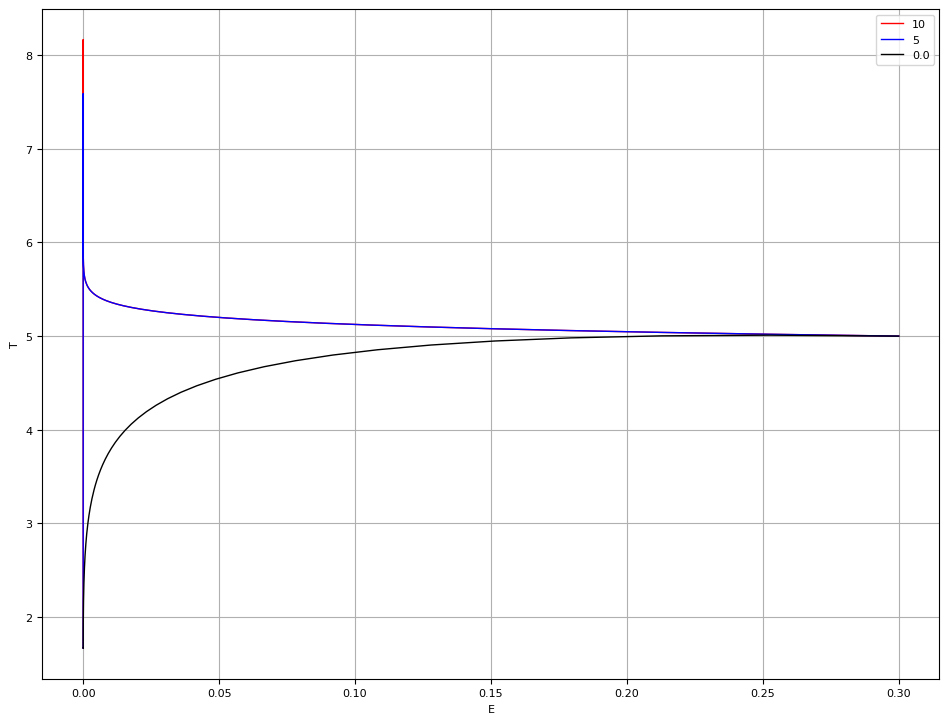

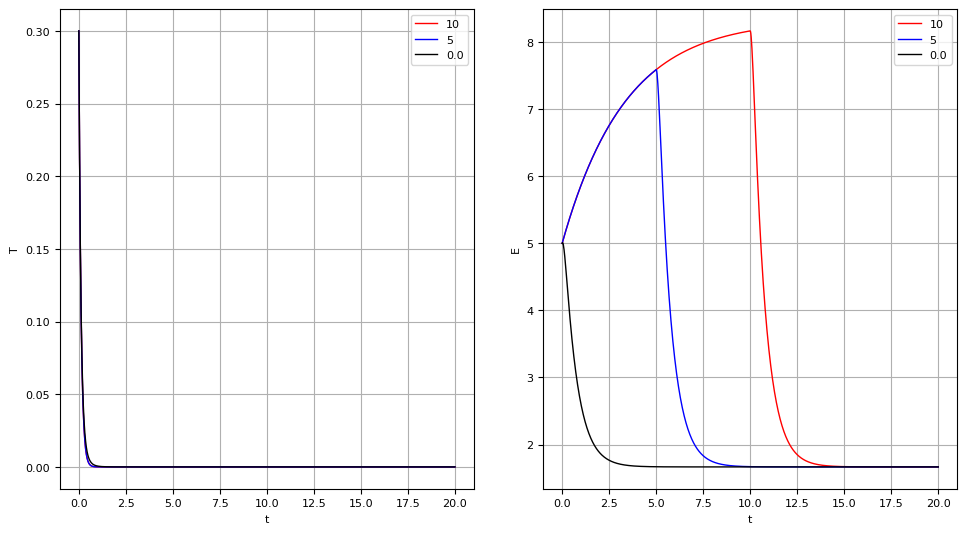

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import symengine
from jitcdde import jitcdde, y, t

r=0.5
K=2.
n=1.8
omega=2.5
miu=4.
nu=1.5

d=symengine.symbols("d")
equations=[
    r*y(0, t)*(1-(y(0, t)/K))-n*y(1, t)*y(0, t),
	  omega+miu*y(0, t - d)*y(1, t)-nu*y(1, t)
]
ddesys1 = jitcdde(equations, control_pars=[d], max_delay=10)
ddesys2 = jitcdde(equations, control_pars=[d], max_delay=10)
ddesys3 = jitcdde(equations, control_pars=[d], max_delay=10)

ts = np.linspace(0, 20, 1000)

ddesys1.constant_past([0.3, 5.])
ddesys2.constant_past([0.3, 5.])
y0sd = [0.3, 5.]
params1=[10]
params2=[5]
ddesys1.set_parameters(*params1)
ddesys2.set_parameters(*params2)
ys1 = []
ys2 = []
for t in ts:
	ys1.append(ddesys1.integrate(t))
for t in ts:
  ys2.append(ddesys2.integrate(t))

ys1=np.array(ys1)
ys2=np.array(ys2)


# Solve the SIR model equations using odeint()
solution = odeint(Tumor_model, y0sd, ts, args=(r,K,n,omega,miu,nu))

# Extract results
T,E = solution.T

# Crear la figura y los subgráficos
fig, axs = plt.subplots(1, 1, figsize=(10,8))
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)  # Ajustar diseño de la figura

# Subgráfico 1
axs.plot(ys1[:,0],ys1[:,1], color='red', linewidth=1, label='10')
axs.plot(ys2[:,0],ys2[:,1], color='blue', linewidth=1, label='5')
axs.plot(T, E, color='black', linewidth=1, label='0.0')
#axs.scatter( 0.45367250374008194, 0.28954685162448784, color='green', label='P^*')
axs.set_xlabel('E')
axs.set_ylabel('T')
axs.legend()  # Añadir leyenda al subgráfico 1
axs.grid(True)  # Añadir rejilla al subgráfico 1

# Mostrar la figura
plt.show()
# Crear la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)  # Ajustar diseño de la figura

# Subgráfico 1
ax1.plot(ts, ys1[:,0], color='red', linewidth=1, label='10')
ax1.plot(ts, ys2[:,0], color='blue', linewidth=1, label='5')
ax1.plot(ts, T, color='black', linewidth=1, label='0.0')
ax1.set_xlabel('t')
ax1.set_ylabel('T')
ax1.legend()  # Añadir leyenda al subgráfico 1
ax1.grid(True)  # Añadir rejilla al subgráfico 1

# Subgráfico 2
ax2.plot(ts, ys1[:,1], color='red', linewidth=1, label='10')
ax2.plot(ts, ys2[:,1], color='blue', linewidth=1, label='5')
ax2.plot(ts, E, color='black', linewidth=1, label='0.0')
ax2.set_xlabel('t')
ax2.set_ylabel('E')
ax2.legend()  # Añadir leyenda al subgráfico 2
ax2.grid(True)  # Añadir rejilla al subgráfico 2


# Mostrar la figura
plt.show()

## Caso 7

Generating, compiling, and loading C code.
Using default integration parameters.
Generating, compiling, and loading C code.
Using default integration parameters.
Generating, compiling, and loading C code.
Using default integration parameters.


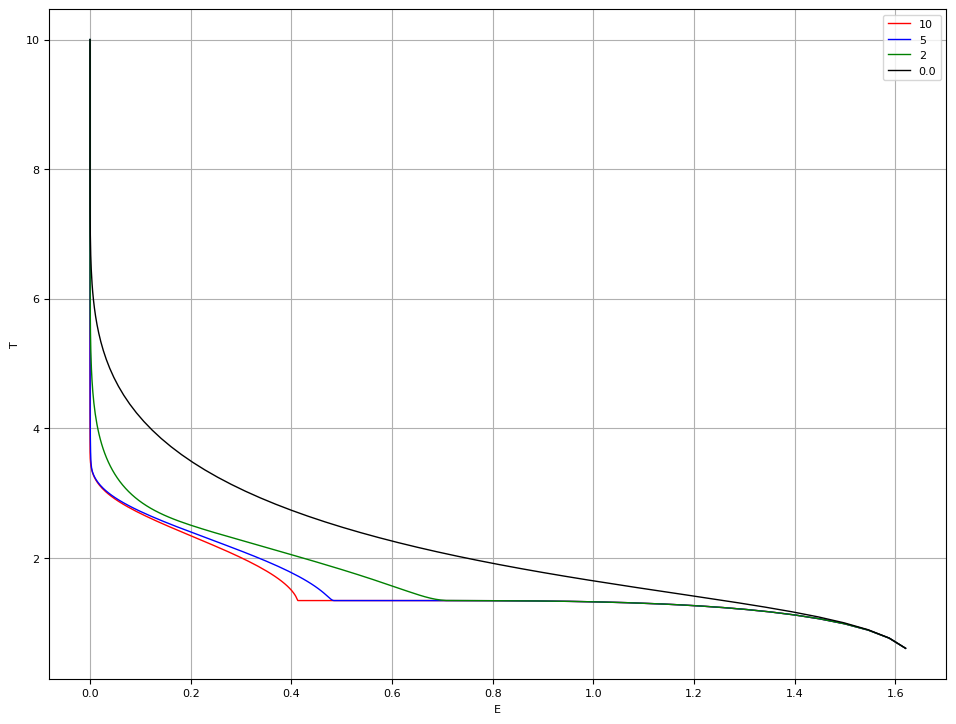

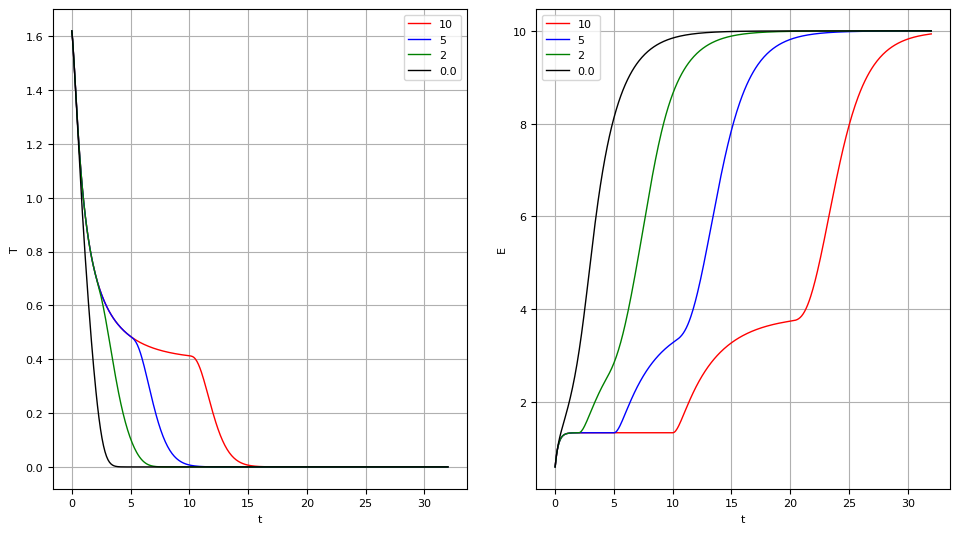

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import symengine
from jitcdde import jitcdde, y, t

r=1.5
K=2.
n=0.9
omega=5.
miu=-2.
nu=0.5

d=symengine.symbols("d")
equations=[
    r*y(0, t)*(1-(y(0, t)/K))-n*y(1, t)*y(0, t),
	  omega+miu*y(0, t - d)*y(1, t)-nu*y(1, t)
]
ddesys1 = jitcdde(equations, control_pars=[d], max_delay=10)
ddesys2 = jitcdde(equations, control_pars=[d], max_delay=10)
ddesys3 = jitcdde(equations, control_pars=[d], max_delay=10)

ts = np.linspace(0, 32, 500)

ddesys1.constant_past([1.62,0.6])
ddesys2.constant_past([1.62,0.6])
ddesys3.constant_past([1.62,0.6])
y0sd = [1.62,0.6]
params1=[10]
params2=[5]
params3=[2]
ddesys1.set_parameters(*params1)
ddesys2.set_parameters(*params2)
ddesys3.set_parameters(*params3)
ys1 = []
ys2 = []
ys3 = []
for t in ts:
	ys1.append(ddesys1.integrate(t))
for t in ts:
  ys2.append(ddesys2.integrate(t))
for t in ts:
  ys3.append(ddesys3.integrate(t))

ys1=np.array(ys1)
ys2=np.array(ys2)
ys3=np.array(ys3)


# Solve the SIR model equations using odeint()
solution = odeint(Tumor_model, y0sd, ts, args=(r,K,n,omega,miu,nu))

# Extract results
T,E = solution.T

# Crear la figura y los subgráficos
fig, axs = plt.subplots(1, 1, figsize=(10,8))
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)  # Ajustar diseño de la figura

# Subgráfico 1
axs.plot(ys1[:,0],ys1[:,1], color='red', linewidth=1, label='10')
axs.plot(ys2[:,0],ys2[:,1], color='blue', linewidth=1, label='5')
axs.plot(ys3[:,0],ys3[:,1], color='green', linewidth=1, label='2')
axs.plot(T, E, color='black', linewidth=1, label='0.0')
#axs.scatter( 0.45367250374008194, 0.28954685162448784, color='green', label='P^*')
axs.set_xlabel('E')
axs.set_ylabel('T')
axs.legend()  # Añadir leyenda al subgráfico 1
axs.grid(True)  # Añadir rejilla al subgráfico 1

# Mostrar la figura
plt.show()
# Crear la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)  # Ajustar diseño de la figura

# Subgráfico 1
ax1.plot(ts, ys1[:,0], color='red', linewidth=1, label='10')
ax1.plot(ts, ys2[:,0], color='blue', linewidth=1, label='5')
ax1.plot(ts, ys3[:,0], color='green', linewidth=1, label='2')
ax1.plot(ts, T, color='black', linewidth=1, label='0.0')
ax1.set_xlabel('t')
ax1.set_ylabel('T')
ax1.legend()  # Añadir leyenda al subgráfico 1
ax1.grid(True)  # Añadir rejilla al subgráfico 1

# Subgráfico 2
ax2.plot(ts, ys1[:,1], color='red', linewidth=1, label='10')
ax2.plot(ts, ys2[:,1], color='blue', linewidth=1, label='5')
ax2.plot(ts, ys3[:,1], color='green', linewidth=1, label='2')
ax2.plot(ts, E, color='black', linewidth=1, label='0.0')
ax2.set_xlabel('t')
ax2.set_ylabel('E')
ax2.legend()  # Añadir leyenda al subgráfico 2
ax2.grid(True)  # Añadir rejilla al subgráfico 2


# Mostrar la figura
plt.show()

## Tabla

$$P_{0}=P_{0}\left(0, \frac{\sigma}{\eta}\right)$$
$$
  \begin{split}
    T^{*}=\frac{K}{2 \mu}\left[\left(\mu+\frac{\eta}{K}\right)-\sqrt{\Delta}\right], & E^{*}=\frac{r}{2 n \mu}\left[\left(\mu-\frac{\eta}{K}\right)+\sqrt{\Delta}\right] \\
T_{*}=\frac{K}{2 \mu}\left[\left(\mu+\frac{\eta}{K}\right)+\sqrt{\Delta}\right], & E_{*}=\frac{r}{2 n \mu}\left[\left(\mu-\frac{\eta}{K}\right)-\sqrt{\Delta}\right] \\
T_{*}^{*}=\frac{K}{2 \mu}\left(\mu+\frac{\eta}{K}\right), & E_{*}^{*}=\frac{r}{2 n \mu}\left(\mu-\frac{\eta}{K}\right),
  \end{split}
\quad
  \begin{split}
    \Delta=\left(\mu-\frac{\eta}{K}\right)^{2}+\frac{4 n \sigma \mu}{K r}
  \end{split}
$$

In [ ]:
import numpy as np

r=2.5
K=0.5
n=0.8
omega=0.5
miu=-0.5
nu=1.5

p0 = [0.0,omega/nu]
p1 = [((K)/(2*miu))*(miu+(nu/K)-np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r))),((r)/(2*n*miu))*(miu-(nu/K)+np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r)))]
p2 = [((K)/(2*miu))*(miu+(nu/K)+np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r))),((r)/(2*n*miu))*(miu-(nu/K)-np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r)))]
p3 = [((K)/(2*miu))*(miu+(nu/K)),((r)/(2*n*miu))*(miu-(nu/K))]

In [ ]:
print(p0,p1,p2,p3)

[0.0, 0.3333333333333333] [0.45367250374008194, 0.28954685162448784] [-2.9536725037400817, 21.58545314837551] [-1.25, 10.9375]


$$\tau_{0}=\frac{1}{\omega_{0}} \arccos \left[\frac{1}{n \mu E^{*} T^{*}}\left(\omega_{0}^{2}-\frac{r \sigma T^{*}}{K E^{*}}\right)\right]$$

$$F(\omega)= \omega^{4}+\left[\left(\frac{r T^{*}}{K}\right)^{2}+\left(\frac{\sigma}{E^{*}}\right)^{2}\right] \omega^{2}-\frac{r^{2}(\mu K-\eta) T^{* 2}}{K^{2}} \sqrt{(\mu K-\eta)^{2}+\frac{4 n \sigma \mu K}{r}}$$

In [ ]:
#poly = x**4 + (((r*p1[0])/(K))**2+(omega/p1[1])**2)*x**(2) - ((r**2)*(miu*K-nu)*(p1[0])**2)/(K**2)*np.sqrt((miu*K-nu)**2+(4*n*omega*miu*K)/(r))
k2 = (((r*p1[0])/(K))**2+(omega/p1[1])**2)
k0 = ((r**2)*(miu*K-nu)*(p1[0]**2))/(K**2)*np.sqrt((miu*K-nu)**2+(4*n*omega*miu*K)/(r))
poly = np.poly1d((1.0,0.0,k2,0.0,-k0))
roots = np.roots(poly)

In [ ]:
omega0 = 0
for root in roots:
  if root > 0:
    print(root)
    omega0 = root

(2.7755575615628914e-17+2.26864361774833j)
(2.7755575615628914e-17-2.26864361774833j)
(1.1102230246251565e-16+1.7264669393496042j)
(1.1102230246251565e-16-1.7264669393496042j)


In [ ]:
print(roots)
print(omega0)
tau0 = (1/omega0)*np.arccos((1/(n*miu*p1[0]*p1[1]))*(omega0**2-((r*omega*p1[0])/(K*p1[1]))))

[2.77555756e-17+2.26864362j 2.77555756e-17-2.26864362j
 1.11022302e-16+1.72646694j 1.11022302e-16-1.72646694j]
(1.1102230246251565e-16-1.7264669393496042j)


In [ ]:
tau0

(3.2264971726009786-1.7529167593405808e-16j)

$$\eta>\mu K>0\text{ y }n \sigma<r \eta$$
$$\mu<0\text{ y } n \sigma<r \eta$$


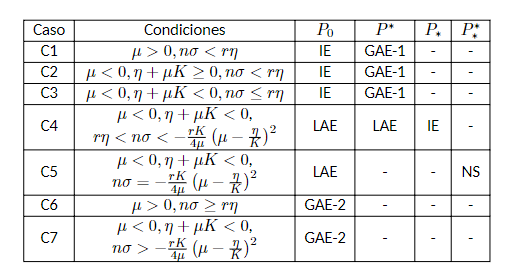


In [ ]:
import numpy as np
df = pd.DataFrame(columns=['r', 'K', 'n', 'omega', 'miu', 'nu', 'p0', 'p1', 'p2', 'tau0'])

#Caso 1
r=2.5
K=2.
n=0.8
omega=0.5
miu=4.
nu=1.5
if(miu>0 and n*omega<r*nu):
  print('caso 1')
  p0 = [0.0,omega/nu]
  p1 = [((K)/(2*miu))*(miu+(nu/K)-np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r))),((r)/(2*n*miu))*(miu-(nu/K)+np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r)))]
  p2 = [((K)/(2*miu))*(miu+(nu/K)+np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r))),((r)/(2*n*miu))*(miu-(nu/K)-np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r)))]
  k2 = (((r*p1[0])/(K))**2+(omega/p1[1])**2)
  k0 = (-(r**2)*(miu*K-nu)*(p1[0]**2))/(K**2)*np.sqrt((miu*K-nu)**2+(4*n*omega*miu*K)/(r))
  poly = np.poly1d((1.0,0.0,k2,0.0,k0))
  roots = np.roots(poly)
  omega0 = 0
  for root in roots:
    if root > 0:
      omega0 = root
  tau0 = (1/omega0)*np.arccos((1/(n*miu*p1[0]*p1[1]))*(omega0**2-((r*omega*p1[0])/(K*p1[1]))))
  dato = [
    {'r': r, 'K': K, 'n': n, 'omega': omega, 'miu': miu, 'nu': nu, 'p0': p0, 'p1': p1, 'p2': '-', 'tau0': tau0},
  ]
  temp_df = pd.DataFrame([dato])
  df = pd.concat([df, temp_df], ignore_index=True)
  print(r,K,n,omega,miu,nu,p0,p1,p2,tau0)
#Caso 2
r=2.5
K=0.5
n=0.8
omega=0.5
miu=-0.5
nu=1.5
if(miu<0 and nu+ miu*K >=0 and n*omega<r*nu):
  print('caso 2')
  p0 = [0.0,omega/nu]
  p1 = [((K)/(2*miu))*(miu+(nu/K)-np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r))),((r)/(2*n*miu))*(miu-(nu/K)+np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r)))]
  p2 = [((K)/(2*miu))*(miu+(nu/K)+np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r))),((r)/(2*n*miu))*(miu-(nu/K)-np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r)))]
  k2 = (((r*p1[0])/(K))**2+(omega/p1[1])**2)
  k0 = (-(r**2)*(miu*K-nu)*(p1[0]**2))/(K**2)*np.sqrt((miu*K-nu)**2+(4*n*omega*miu*K)/(r))
  poly = np.poly1d((1.0,0.0,k2,0.0,k0))
  roots = np.roots(poly)
  omega0 = 0
  for root in roots:
    if root > 0:
      omega0 = root
  tau0 = (1/omega0)*np.arccos((1/(n*miu*p1[0]*p1[1]))*(omega0**2-((r*omega*p1[0])/(K*p1[1]))))
  dato = [
    {'r': r, 'K': K, 'n': n, 'omega': omega, 'miu': miu, 'nu': nu, 'p0': p0, 'p1': p1, 'p2': '-', 'tau0': '-'},
  ]
  temp_df = pd.DataFrame([dato])
  df = pd.concat([df, temp_df], ignore_index=True)
  print(r,K,n,omega,miu,nu,p0,p1,p2,tau0)
#Caso 3
r=2.5
K=3.
n=0.8
omega=0.5
miu=-2.5
nu=1.5
if(miu<0 and nu+ miu*K <0 and n*omega<=r*nu):
  print('caso 3')
  p0 = [0.0,omega/nu]
  p1 = [((K)/(2*miu))*(miu+(nu/K)-np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r))),((r)/(2*n*miu))*(miu-(nu/K)+np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r)))]
  p2 = [((K)/(2*miu))*(miu+(nu/K)+np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r))),((r)/(2*n*miu))*(miu-(nu/K)-np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r)))]
  k2 = (((r*p1[0])/(K))**2+(omega/p1[1])**2)
  k0 = (-(r**2)*(miu*K-nu)*(p1[0]**2))/(K**2)*np.sqrt((miu*K-nu)**2+(4*n*omega*miu*K)/(r))
  poly = np.poly1d((1.0,0.0,k2,0.0,k0))
  roots = np.roots(poly)
  omega0 = 0
  for root in roots:
    if root > 0:
      omega0 = root
  tau0 = (1/omega0)*np.arccos((1/(n*miu*p1[0]*p1[1]))*(omega0**2-((r*omega*p1[0])/(K*p1[1]))))
  dato = [
    {'r': r, 'K': K, 'n': n, 'omega': omega, 'miu': miu, 'nu': nu, 'p0': p0, 'p1': p1, 'p2': '-', 'tau0': '-'},
  ]
  temp_df = pd.DataFrame([dato])
  df = pd.concat([df, temp_df], ignore_index=True)
  print(r,K,n,omega,miu,nu,p0,p1,p2,tau0)
  #Caso 4
r=2.5
K=4.
n=0.8
omega=6.2
miu=-1.2
nu=1.5
if(miu<0 and nu+ miu*K <0 and r*nu<n*omega<-((r*K)/(2*miu))*(miu-((nu)/(K)))**2):
  print('caso 4')
  p0 = [0.0,omega/nu]
  p1 = [((K)/(2*miu))*(miu+(nu/K)-np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r))),((r)/(2*n*miu))*(miu-(nu/K)+np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r)))]
  p2 = [((K)/(2*miu))*(miu+(nu/K)+np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r))),((r)/(2*n*miu))*(miu-(nu/K)-np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r)))]
  k2 = (((r*p1[0])/(K))**2+(omega/p1[1])**2)
  k0 = (-(r**2)*(miu*K-nu)*(p1[0]**2))/(K**2)*np.sqrt((miu*K-nu)**2+(4*n*omega*miu*K)/(r))
  poly = np.poly1d((1.0,0.0,k2,0.0,k0))
  roots = np.roots(poly)
  omega0 = 0
  for root in roots:
    if root > 0:
      omega0 = root
  tau0 = (1/omega0)*np.arccos((1/(n*miu*p1[0]*p1[1]))*(omega0**2-((r*omega*p1[0])/(K*p1[1]))))
  dato = [
    {'r': r, 'K': K, 'n': n, 'omega': omega, 'miu': miu, 'nu': nu, 'p0': p0, 'p1': p1, 'p2': p2, 'tau0': '-'},
  ]
  temp_df = pd.DataFrame([dato])
  df = pd.concat([df, temp_df], ignore_index=True)
  print(r,K,n,omega,miu,nu,p0,p1,p2,tau0)
#Caso 6
r=0.5
K=2.
n=1.8
omega=2.5
miu=4.
nu=1.5
if(miu>0 and n*omega>=r*nu):
  print('caso 6')
  p0 = [0.0,omega/nu]
  p1 = [((K)/(2*miu))*(miu+(nu/K)-np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r))),((r)/(2*n*miu))*(miu-(nu/K)+np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r)))]
  p2 = [((K)/(2*miu))*(miu+(nu/K)+np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r))),((r)/(2*n*miu))*(miu-(nu/K)-np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r)))]
  tau0 = 'no aplica'
  dato = [
    {'r': r, 'K': K, 'n': n, 'omega': omega, 'miu': miu, 'nu': nu, 'p0': p0, 'p1': '-', 'p2': '-', 'tau0': '-'},
  ]
  temp_df = pd.DataFrame([dato])
  df = pd.concat([df, temp_df], ignore_index=True)
  print(r,K,n,omega,miu,nu,p0,p1,p2,tau0)
#Caso 7
r=1.5
K=2.
n=0.9
omega=5.
miu=-2.
nu=0.5
if(miu<0 and nu+ miu*K <0 and r*nu<n*omega>-((r*K)/(2*miu))*(miu-((nu)/(K)))**2):
  print('caso 7')
  p0 = [0.0,omega/nu]
  p1 = [((K)/(2*miu))*(miu+(nu/K)-np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r))),((r)/(2*n*miu))*(miu-(nu/K)+np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r)))]
  p2 = [((K)/(2*miu))*(miu+(nu/K)+np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r))),((r)/(2*n*miu))*(miu-(nu/K)-np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r)))]
  tau0 = 'no aplica'
  dato = [
    {'r': r, 'K': K, 'n': n, 'omega': omega, 'miu': miu, 'nu': nu, 'p0': p0, 'p1': '-', 'p2': '-', 'tau0': '-'},
  ]
  temp_df = pd.DataFrame([dato])
  df = pd.concat([df, temp_df], ignore_index=True)
  print(r,K,n,omega,miu,nu,p0,p1,p2,tau0)

caso 1
2.5 2.0 0.8 0.5 4.0 1.5 [0.0, 0.3333333333333333] [0.3271766596215119, 2.6137864693413877] [2.0478233403784882, -0.0747239693413877] (0.22427329176966415+0j)
caso 2
2.5 0.5 0.8 0.5 -0.5 1.5 [0.0, 0.3333333333333333] [0.45367250374008194, 0.28954685162448784] [-2.9536725037400817, 21.58545314837551] (3.2264971726009786-1.7529167593405808e-16j)
caso 3
2.5 3.0 0.8 0.5 -2.5 1.5 [0.0, 0.3333333333333333] [2.9458522274236154, 0.056403929767067096] [-0.5458522274236156, 3.6935960702329327] (2.085635574753503-4.3171764396165117e-17j)
caso 4
2.5 4.0 0.8 6.2 -1.2 1.5 [0.0, 4.133333333333334] [1.9015849092659851, 1.6393867896359493] [0.8484150907340149, 2.462175710364051] (1.3390998894449178-2.3991787854041884e-16j)
caso 6
0.5 2.0 1.8 2.5 4.0 1.5 [0.0, 1.6666666666666667] [-1.0840977306732809, 0.4283469070379557] [3.459097730673281, -0.20265246259351125] no aplica
caso 7
1.5 2.0 0.9 5.0 -2.0 0.5 [0.0, 10.0] [nan, nan] [nan, nan] no aplica


<ipython-input-87-2b1d053bbc28>:141: RuntimeWarning: invalid value encountered in sqrt
  p1 = [((K)/(2*miu))*(miu+(nu/K)-np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r))),((r)/(2*n*miu))*(miu-(nu/K)+np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r)))]
<ipython-input-87-2b1d053bbc28>:142: RuntimeWarning: invalid value encountered in sqrt
  p2 = [((K)/(2*miu))*(miu+(nu/K)+np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r))),((r)/(2*n*miu))*(miu-(nu/K)-np.sqrt((miu-(nu/K))**2+(4*n*omega*miu)/(K*r)))]
